# Boxplots and paired differences

### Importing pandas tool and getting the csv file

In [1]:
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


### Creating from arrays from numpy

In [2]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

### Expose them as pandas.DataFrame

In [3]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


### Collect information on the rows and columns on the graph

In [4]:
data.shape    # 40 rows and 8 columns

(40, 8)

In [5]:
data.columns  # It has columns   

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

Print the column Gender from the csv file

In [6]:
print(data['Gender'])  # Columns can be addressed by name

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [7]:
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

np.float64(109.45)

### Splitting data into catagorical variables

In [8]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


In [9]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Exercise 1

### What is the mean value for VIQ for the full population?

In [10]:
mean_viq = data['VIQ'].mean()

print(f"The mean VIQ for the full population is: {mean_viq}")

The mean VIQ for the full population is: 112.35


### How many males/females were included in this study?

In [11]:
gender_counts = data['Gender'].value_counts()

print(gender_counts)

Gender
Female    20
Male      20
Name: count, dtype: int64


### What is the average value of MRI counts expressed in log units, for males and females

In [12]:
average_mri_by_gender = data.groupby('Gender')['MRI_Count'].mean()

print(average_mri_by_gender)

Gender
Female    862654.6
Male      954855.4
Name: MRI_Count, dtype: float64


### Plotting the data using pandas and matplotlib. This uses the data from the csv to make the scatter plot

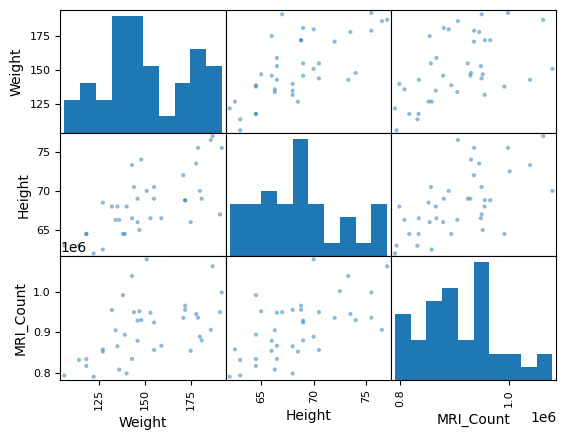

In [13]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

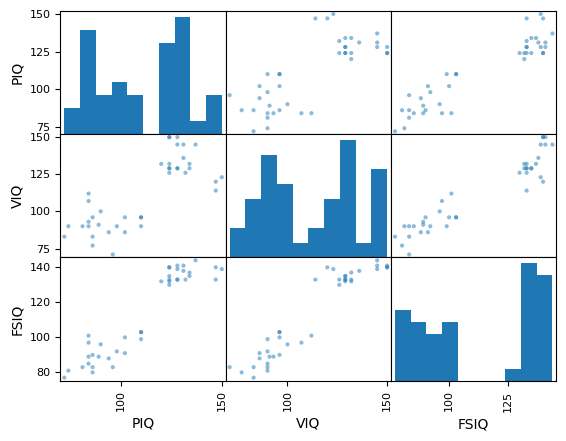

In [14]:
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
plt.show

## Exercise 2

### Plot the scatter matrix for males only, and for females only. Do you think that the 2 sub-populations correspond to gender?

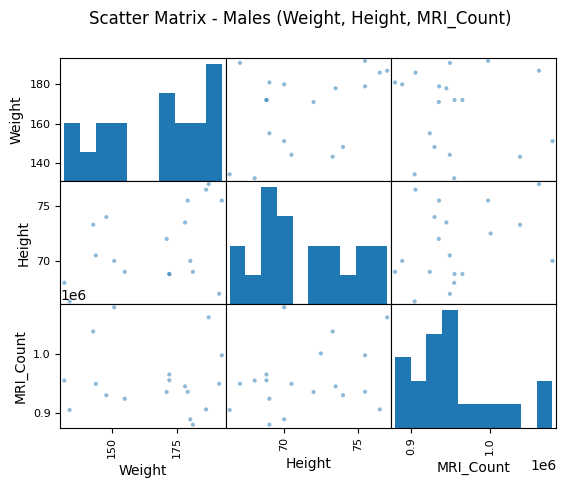

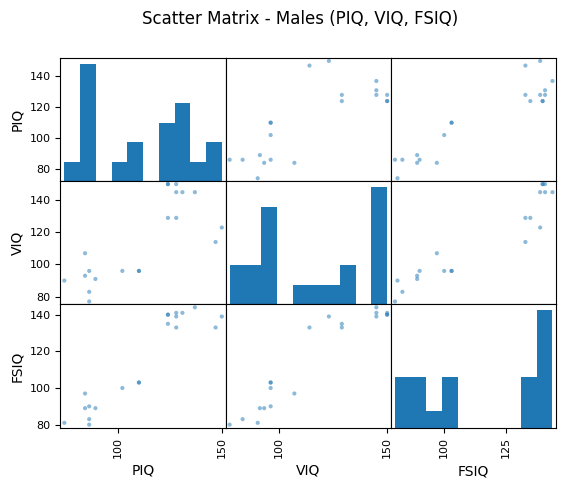

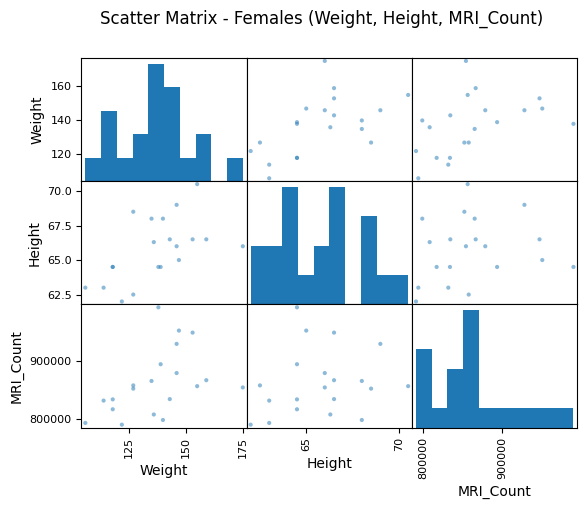

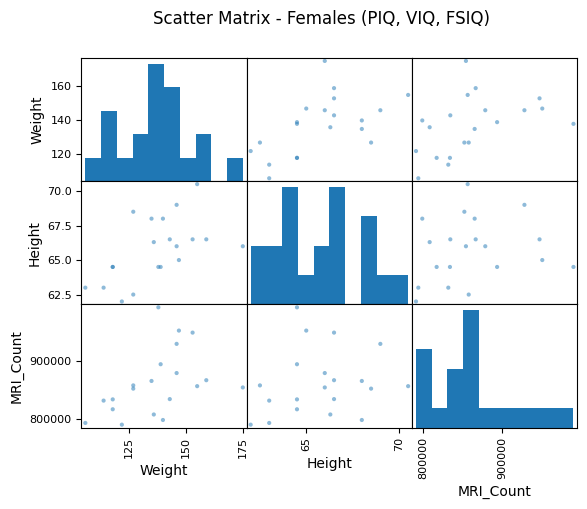

In [15]:
males = data[data['Gender'] == 'Male']
females = data[data['Gender'] == 'Female']

# --- Males ---

# Scatter matrix for physical features (males)
scatter_matrix(males[['Weight', 'Height', 'MRI_Count']])
plt.suptitle("Scatter Matrix - Males (Weight, Height, MRI_Count)")
plt.show()

# Scatter matrix for IQ scores (males)
scatter_matrix(males[['PIQ', 'VIQ', 'FSIQ']])
plt.suptitle("Scatter Matrix - Males (PIQ, VIQ, FSIQ)")
plt.show()

# --- Females ---

# Scatter matrix for physical features (females)
scatter_matrix(females[['Weight', 'Height', 'MRI_Count']])
plt.suptitle("Scatter Matrix - Females (Weight, Height, MRI_Count)")
plt.show()

# Scatter matrix for IQ scores (females)
scatter_matrix(females[['Weight', 'Height', 'MRI_Count']])
plt.suptitle("Scatter Matrix - Females (PIQ, VIQ, FSIQ)")
plt.show()

## 3.1.2.Hypothesis testing: Comparing two groups

### To do simple tests, we are using a subset of scipy (stats) 

In [16]:
from scipy import stats

### 1-sample T-test

In [17]:
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

### 2-sample t-test

In [18]:
female_viq = data[data['Gender'] == 'Female']['VIQ']

In [19]:
male_viq = data[data['Gender'] == 'Male']['VIQ']

In [20]:
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

## 3.1.2.2. Paired tests: repeated measurements on the same individuals

### Test if FISQ and PIQ are significantly different using a 2 sample test

In [21]:
stats.ttest_ind(data['FSIQ'], data['PIQ']) 

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

### Account for links between FSIQ and PIQ using a pared t-test

In [22]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

### Equivalent to a 1-sample test

In [23]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

### Use a Wilcoxon signed-rank test to relax the T-tests assumption of Gaussian errors

In [24]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

## Exercise 3

### Test the difference between weights in males and females.

In [25]:
female_weight = data[data['Gender'] == 'Female']['Weight'].dropna()
male_weight = data[data['Gender'] == 'Male']['Weight'].dropna()
result = stats.ttest_ind(female_weight, male_weight, equal_var=False)  # Welch's t-test is safer
print(result)

TtestResult(statistic=np.float64(-4.827378552057042), pvalue=np.float64(2.9649003096009486e-05), df=np.float64(33.50678044084757))


### Use non parametric statistics to test the difference between VIQ in males and females.

## 3.1.3.1. Linear models, multiple factors, and analysis of varience

### Generates simulated data according to the model

In [26]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

In [27]:
!pip install statsmodels

### Specify an OLS model and fit it

In [28]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data=data).fit()

In [29]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           8.56e-08
Time:                        21:06:59   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Exercise 4

### Retrieve the estimated parameters from the model above

In [33]:
intercept = model.params['Intercept']
slope = model.params['x']
print(intercept)
print(slope)

-5.533458545842917
2.93688831554405


### Going back to using the brain_size data

In [34]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

### Comparison between IQ of male vs. female

model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

### An integer column can be forced to be treated as categorical using

In [35]:
model = ols('VIQ ~ C(Gender)', data).fit()

### Link to t-tests between differrent FSIQ and PIQ

In [36]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [37]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.643
Time:                        21:16:44   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

### Can see that we retrieve the same values for t-test and corresponding p-values for the effect of the type of iq than the previous t-test

In [38]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

## 3.1.3.2 Multiple Regression: including multiple factors

### Read the iris.csv in and set the model

In [39]:
data = pandas.read_csv('iris.csv')

In [40]:
model = ols('sepal_width ~ name + petal_length', data).fit()

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.58e-20
Time:                        21:16:52   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

## 3.1.3.3. Post-hoc hypothesis testing: analysis of variance (ANOVA)

## F-test to test the vector of contrast 

In [42]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574177, p=0.0736905878170114, df_denom=146, df_num=1>


## Exercise 5

### Going back to the brain size + IQ data, test if the VIQ of male and female are different after removing the effect of brain size, height and weight

In [65]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
data = pandas.read_csv("brain_size.csv", sep=";", na_values=".")
model = smf.ols('VIQ ~ MRI_Count + Height + Weight + Gender', data=data).fit()

# Show the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.733
Date:                Wed, 16 Jul 2025   Prob (F-statistic):             0.0455
Time:                        21:33:12   Log-Likelihood:                -167.03
No. Observations:                  38   AIC:                             344.1
Df Residuals:                      33   BIC:                             352.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        169.7719     90.054      1.

## 3.1.4. More Visualization: seaborn for statistical exploration

In [43]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


## 3.1.3.1. Pairplot: scatter matrices

### Intuition on interactions by using seaborn. Then will use seaborn.pairlot to display a scatter plot

In [44]:
!pip install seaborn

In [66]:
import urllib.request
import os

import matplotlib.pyplot as plt

In [67]:
if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve(
        'http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
        'wages.txt'
    )
# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]
short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

/tmp/slurmtmp.1688701/ipykernel_3625436/4135314094.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,


In [68]:
# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

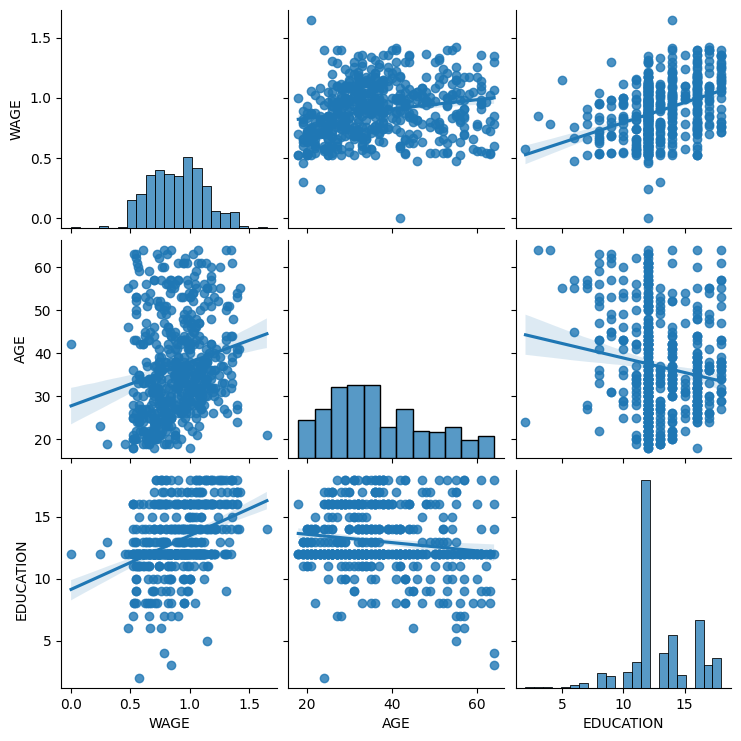

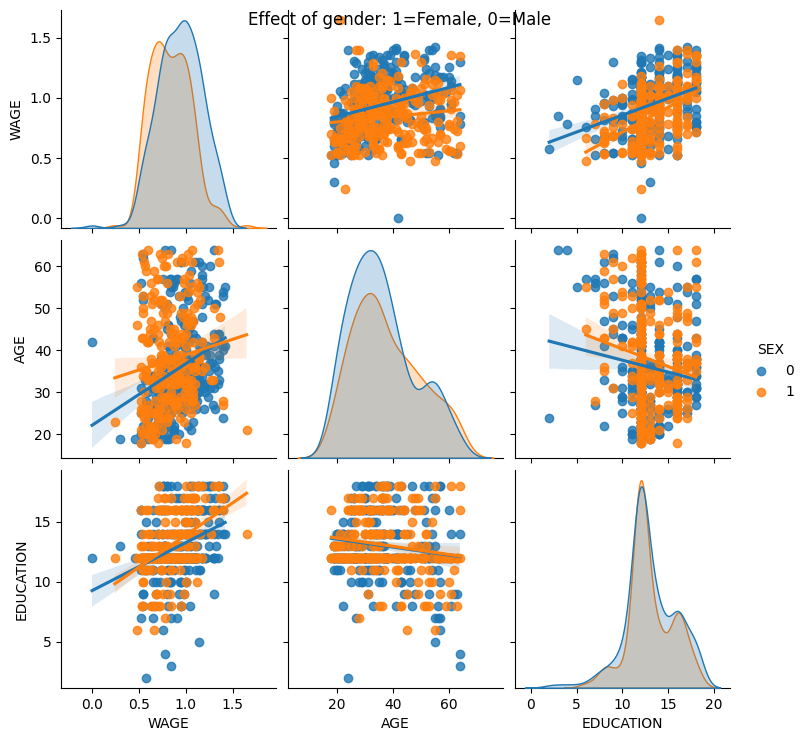

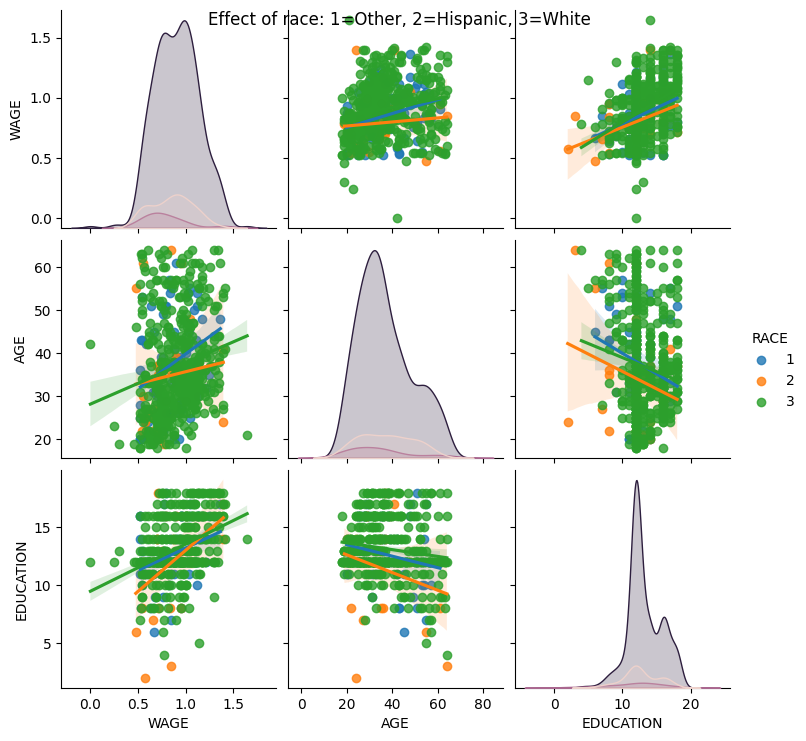

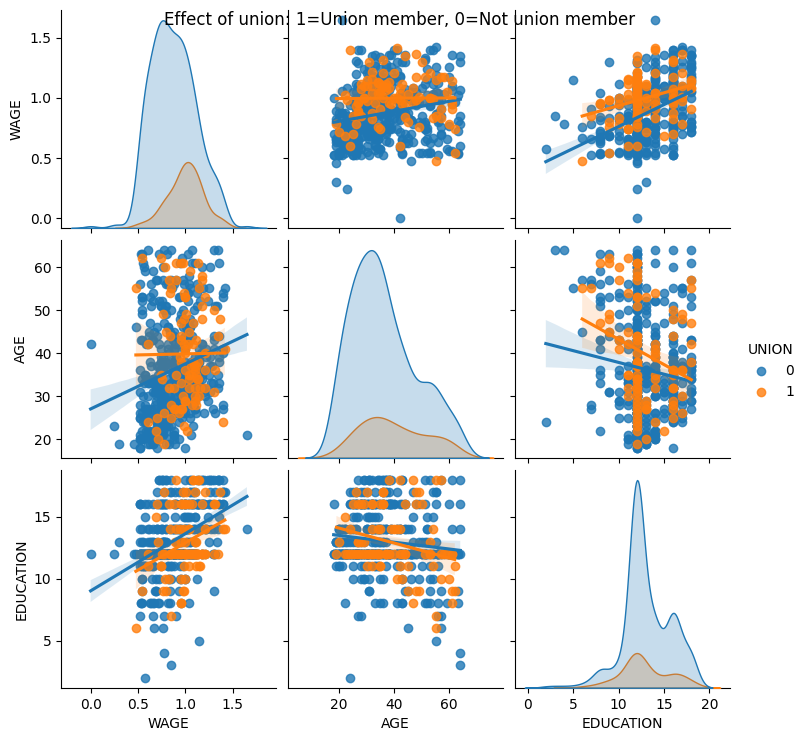

In [69]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

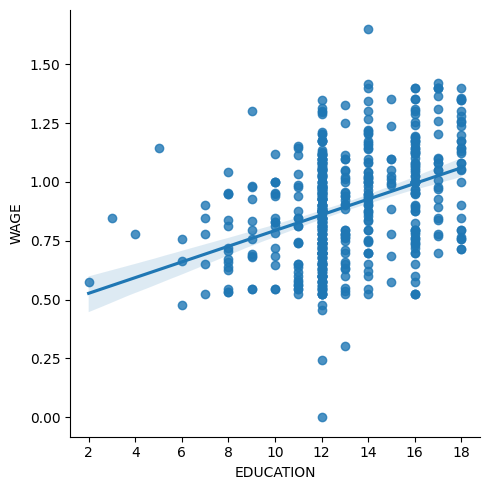

In [70]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

plt.show()

In [71]:
import seaborn

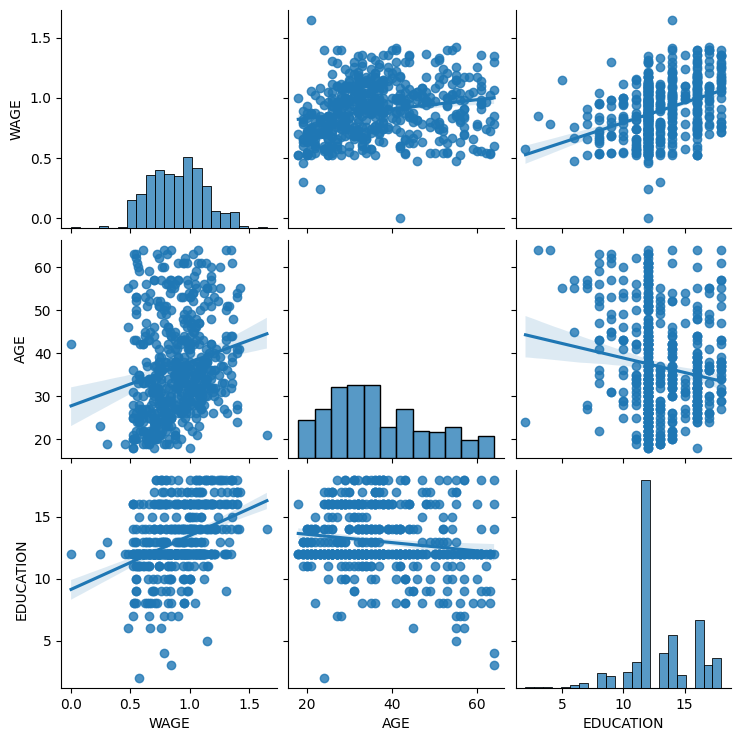

In [72]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg')

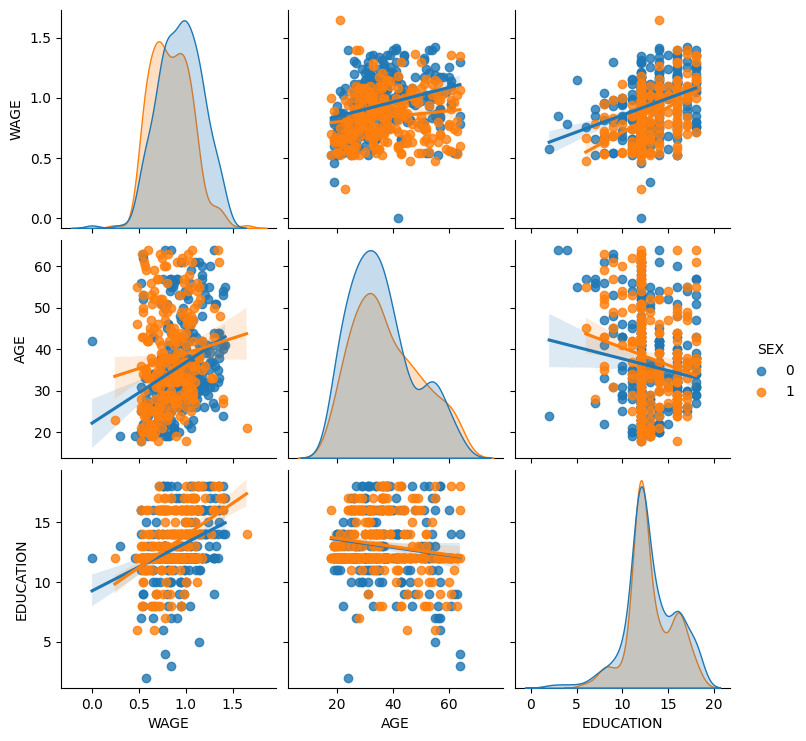

In [73]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')

In [74]:
from matplotlib import pyplot as plt

In [75]:
plt.rcdefaults()

## 3.1.4.2 Implot: plotting a univariate regression

### Regression with the relation between wage and education plotted using seaborn.lmplot()

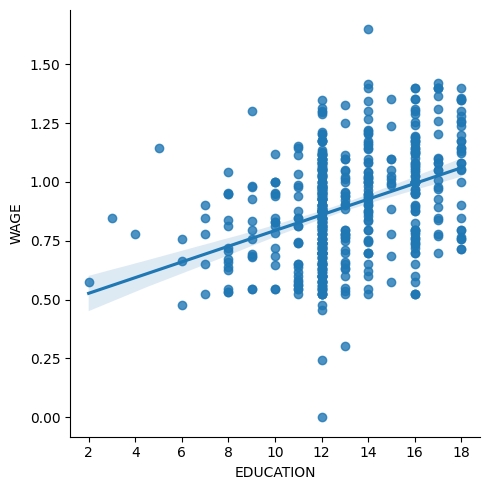

In [76]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

## 3.1.5. Testing for interactions

In [77]:
import statsmodels.formula.api as smf
result = smf.ols('WAGE ~ EDUCATION + SEX + EDUCATION * SEX', data=data).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.94e-25
Time:                        21:34:28   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861